<img src='../img/EU-Copernicus-EUM_3Logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='50%'></img>

<br>

<a href="../00_index.ipynb"><< Index</a><br>
<a href="./311_AC_SAF_GOME-2_L2_case_study.ipynb"><< 311 - Case study - AC SAF GOME-2 - Level 2</a><span style="float:right;"><a href="./313_AC_SAF_GOME-2_L2_produce_gridded_dataset_workflow.ipynb">313 - Workflow - AC SAF GOME-2 - Level 2 - Produce gridded dataset (Level 3) >></a></span>

<div class="alert alert-block alert-warning">
<b>30 - CASE STUDIES</b></div>

<div class="alert alert-block alert-warning">

<b>PREREQUISITES </b>

The following **20 - DATA DISCOVERY** module is a prerequisite:
- [213 - AC SAF GOME-2 - Level 3 - Load and browse](../20_data_discovery/213_AC_SAF_GOME-2_L3_load_browse.ipynb)

It is recommended to go through the module before you start with this module.
</div>

<hr>

# 3.1.2 Case study - AC SAF - GOME-2 - Level 3

The AC SAF GOME-2 Level 3 longterm monthly average data products are helpful to get a better overall picture of an atmospheric compostion parameter. Following workflows will help you to get a better understanding of the behaviour of one specific parameter:
* <b>Visualization of global monthly aggregates</b><br>
    You can visualize the monthly aggregates on a `2D Map`.
* <b>Visualization of a longterm trend for one specific location or region</b><br>
    You can generate a `time series plot` and visualize the longterm trend for one specific location. You can also compare two different locations and data values can also be spatially aggregated to visualize the global or regional longterm trend.

This notebook contains examples of the Level 3 data product `Nitrogen dioxide`. At the beginning, there is a section that loads required libraries and the Level 3 data product as xarray `Datasets`. Some functions that will be reused will be defined as well.

#### Module outline:
* **[Nitrogen dioxide - Workflow example](#no2)**
 * [1 - Load GOME-2 Level 3 NO<sub>2</sub> products](#load)
 * [2 - Explore data with a 2D Map](#2d_map)
 * [3 - Explore longterm trends of tropospheric column NO2 for specific locations](#trends)

<hr>

#### Load required libraries

In [25]:
%matplotlib inline
import xarray as xr
import pandas as pd
import numpy as np
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

#### Load helper functions

In [26]:
%run ../functions.ipynb

<hr>

## <a id="no2"></a>Nitrogen dioxide - Workflow example

### Load GOME-2 Level 3 Nitrogen Dioxide products

#### Load NO<sub>2</sub> data products

Let us load the GOME-2 Levels Nitrogendioxide NO<sub>2</sub> data with xarray's library `xr.open_mfdataset`. You see that the data is a three-dimensional dataset with the dimensions `latitude`, `longitude` and `time` and seven data variables.
However, the dimensions have not any coordinates assigned. For this reason, in a next step, you have to load one single file to retrieve latitude and longitude information and build a list of time coordinates.

In [7]:
no2 = xr.open_mfdataset('../eodata/gome2/level3/no2/*.nc', concat_dim='time', combine='nested',  group='PRODUCT')
no2


<xarray.Dataset>
Dimensions:          (latitude: 720, longitude: 1440, time: 130)
Dimensions without coordinates: latitude, longitude, time
Data variables:
    NO2total         (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    NO2total_err     (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    NO2total_stddev  (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    NO2trop          (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    NO2trop_err      (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    NO2trop_stddev   (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    nobs             (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>

#### Load coordinate information to assign coordinates

Load a single GOME-2 Level 3 data file with xarray's function `xr.open_dataset`. You see that the two dimensions `latitude` and `longitude` have coordinates assigned. You can store the latitude and longitude information in separated variables.


In [9]:
no2_ds = xr.open_dataset('../eodata/gome2/level3/no2/GOME_NO2_Global_201701_METOPB_DLR_v1.nc')
no2_ds

no2_lat = no2_ds.latitude
no2_lon = no2_ds.longitude

In a next step, you have to build a list of time coordinates with `pandas`, which you can use to assign the time dimension for the Level 3 data. The GOME-2 Level 3 data are available from February 2007 to November 2017.

In [10]:
# Build list of time coordinates with pandas
time_coords = pd.date_range('2007-02', '2017-11', freq='MS').strftime("%Y-%m").astype('datetime64[ns]')
time_coords

DatetimeIndex(['2007-02-01', '2007-03-01', '2007-04-01', '2007-05-01',
               '2007-06-01', '2007-07-01', '2007-08-01', '2007-09-01',
               '2007-10-01', '2007-11-01',
               ...
               '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01',
               '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01',
               '2017-10-01', '2017-11-01'],
              dtype='datetime64[ns]', length=130, freq=None)

In a final step, you can assign the coordinates for the three dimensions, `latitude`, `longitude` and `time` with xarray's function `xr.assign_coords`.

In [11]:
no2_assigned = no2.assign_coords(latitude=no2_lat, longitude=no2_lon, time=time_coords)
no2_assigned

<xarray.Dataset>
Dimensions:          (latitude: 720, longitude: 1440, time: 130)
Coordinates:
  * latitude         (latitude) float32 -89.88 -89.62 -89.38 ... 89.62 89.88
  * longitude        (longitude) float32 -179.9 -179.6 -179.4 ... 179.6 179.9
  * time             (time) datetime64[ns] 2007-02-01 2007-03-01 ... 2017-11-01
Data variables:
    NO2total         (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    NO2total_err     (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    NO2total_stddev  (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    NO2trop          (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    NO2trop_err      (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    NO2trop_stddev   (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    nobs             (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>

### <a id="2d_map"></a>Explore data with a `2D Map`

A first step to explore the data is to create a simple `2D Map`. You can make use of the function [visualize_pcolormesh](../functions.ipynb#visualize_pcolormesh). The function takes the following arguments:
* `data_array`
* `longitude`
* `latitude`
* `projection`
* `color_scale`
* `unit`
* `long_name`
* `vmin`
* `vmax`

Per default, the functions plots the data with a global extent.


First, select the `NO2trop` variable, which is the `Tropospheric Column NO2 content`.

In [30]:
no2trop=no2_assigned.NO2trop
no2trop

<xarray.DataArray 'NO2trop' (time: 130, latitude: 720, longitude: 1440)>
dask.array<concatenate, shape=(130, 720, 1440), dtype=float32, chunksize=(1, 720, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * time       (time) datetime64[ns] 2007-02-01 2007-03-01 ... 2017-11-01
Attributes:
    long_name:      Tropospheric Column NO2 content
    units:          molec cm-2
    standard_name:  troposphere_mole_content_of_nitrogen_dioxide

Now, let us apply the visualisation function. You can specify a specific month and visualize the tropospheric NO<sub>2</sub> column content.

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Tropospheric Column NO2 content'}>)

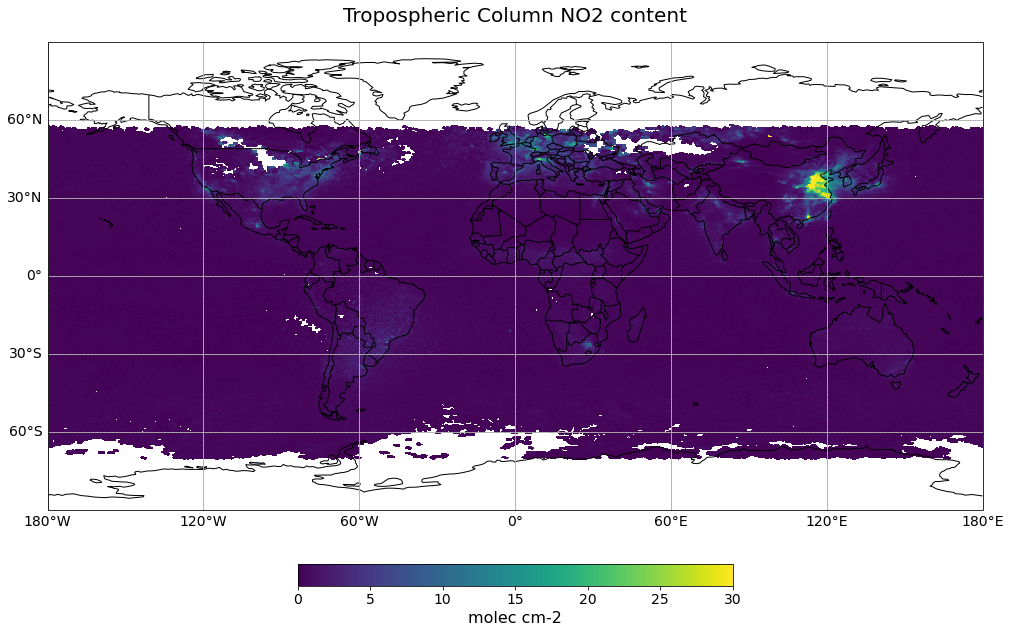

In [31]:
month=10
visualize_pcolormesh(data_array=no2trop[month,:,:]*1e-15,
                     longitude=no2trop.longitude,
                     latitude=no2trop.latitude,
                     projection=ccrs.PlateCarree(),
                     color_scale='viridis',
                     unit=no2trop.units,
                     long_name=no2trop.long_name,
                     vmin=0,
                     vmax=30)

<br>

### <a id="trends"></a>2) Explore longterm trends of tropospheric column NO<sub>2</sub> for specific locations

The above map shows that there is a prominent increase of the tropospheric column of nitrogen dioxide in the Beijing region. Let's have a look at the longterm trend for individual point locations.

xarray's label based selection method `sel` allows to select data based on name or value. `sel` further allows for enabling nearest neighbor, which select the closest latitude or longitude value. xarray offers a simple plotting wrapper of Python's matplotlib. Thus, we can directly apply the `plot` function to a `DataArray` object. We can add additional specifications, e.g. if it shall be a line plot, what color and style the line shall have, etc.


Let's plot the temporal trends for two locations: `Beijing` and `Darmstadt`, to see how much more the tropospheric NO<sub>2</sub> levels in Beijing are elevated compared to a city in Germany. We specify latitude and longitude coordinates for both cities and plot the two `xarray.DataArrays` as line plots.

NOTE: the NO<sub>2</sub> values are shown in 1e<sup>-15</sup> molecules per cm<sup>2</sup>.

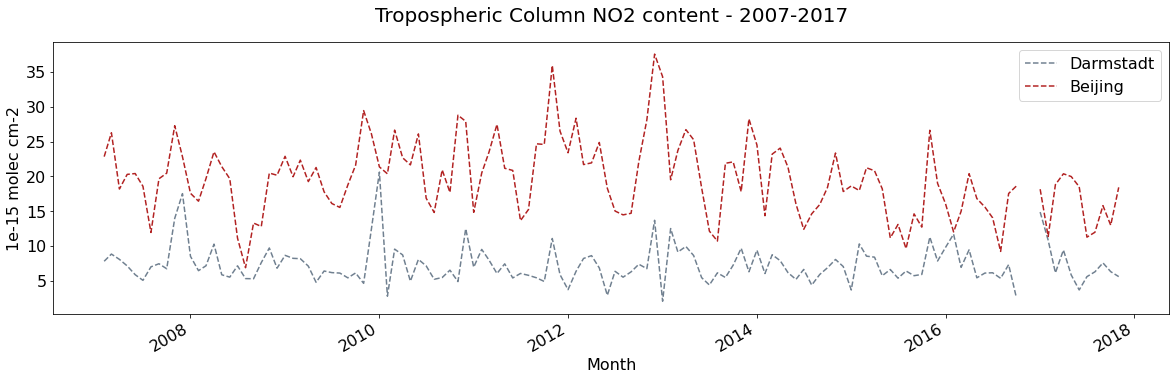

In [32]:
fig = plt.figure(figsize=(20,5))

# Latitude / Longitude coordinates for Darmstadt
city1 = 'Darmstadt'
lat1 = 49.875
lon1 = 8.650

# Latitude / Longitude coordinates for Beijing
city2 = 'Beijing'
lat2 = 39.908
lon2 = 116.397

conversion_factor = 1e-15

city1_total = no2_assigned.NO2trop.sel(latitude=lat1, longitude=lon1, method='nearest')*conversion_factor
city1_total.plot.line(color='slategrey', linestyle='dashed', label=city1)

city2_total = no2_assigned.NO2trop.sel(latitude=lat2, longitude=lon2, method='nearest')*conversion_factor
city2_total.plot.line(linestyle='dashed',color='firebrick', label=city2)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title(no2_assigned.NO2trop.long_name + " - 2007-2017", fontsize=20, pad=20)
plt.ylabel(str(conversion_factor) + ' ' + no2_assigned.NO2trop.units, fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.legend(fontsize=16,loc=1)
plt.show()

<br>

The plot above shows that the NO<sub>2</sub> levels in Beijing are in general higher than the levels in Darmstadt.

There is a prominent spike of tropospheric NO<sub>2</sub> levels in Beijing in January 2013, which reflects the [Heavy haze pollution episode over central and western China](https://link.springer.com/article/10.1007/s11430-013-4773-4).

<br>

<a href="../00_index.ipynb"><< Index</a><br>
<a href="./311_AC_SAF_GOME-2_L2_case_study.ipynb"><< 311 - Case study - AC SAF GOME-2 - Level 2</a><span style="float:right;"><a href="./313_AC_SAF_GOME-2_L2_produce_gridded_dataset_workflow.ipynb">313 - Workflow - AC SAF GOME-2 - Level 2 - Produce gridded dataset (Level 3) >></a></span>

<hr>

<p><img src='../img/copernicus_logo.png' align='left' alt='Logo EU Copernicus' width='25%'></img></p>
<br clear=left>
<p style="text-align:left;">This project is licensed under the <a href="../LICENSE">MIT License</a> <span style="float:right;"><a href="https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a>